In [ ]:
import pandas as pd

df = pd.read_csv('/content/personal_expense_data.csv')
df.head()


,Income,Age,Dependents,City_Tier,Occupation,Rent,Loan_Repayment,Insurance,Food,Shopping,Travel,Entertainment,Healthcare,Education,Desired_Savings,Disposable_Income,Potential_Savings,Latitude,Longitude
0,50000,28,2,1,Engineer,12000,5000,2000,8000,3000,1500,2000,1000,500,10000,25000,12000,19.0760,72.8777
1,70000,35,3,2,Manager,20000,7000,3000,12000,5000,2000,3000,1500,1000,20000,35000,18000,28.7041,77.1025
2,40000,25,1,3,Analyst,10000,2000,1000,5000,2000,1000,1500,800,300,5000,20000,6000,12.9716,77.5946
3,60000,40,4,1,Doctor,15000,8000,2500,10000,4000,1800,2500,1200,800,15000,30000,15000,19.2183,72.9781
4,55000,30,2,2,Teacher,13000,3000,1500,7000,2500,1200,1800,900,400,12000,25000,10000,22.5726,88.3639


In [ ]:
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)


In [ ]:
df.dtypes


,0
Income,int64
Age,int64
Dependents,int64
City_Tier,int64
Occupation,object
Rent,int64
Loan_Repayment,int64
Insurance,int64
Food,int64
Shopping,int64


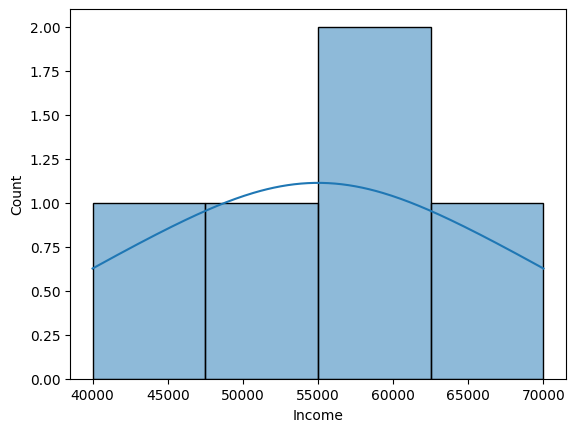

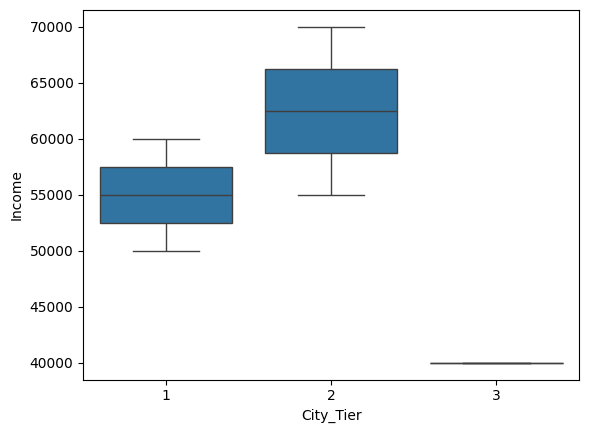

In [ ]:
#STep 3

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Income'], kde=True)
plt.show()

sns.boxplot(x='City_Tier', y='Income', data=df)
plt.show()


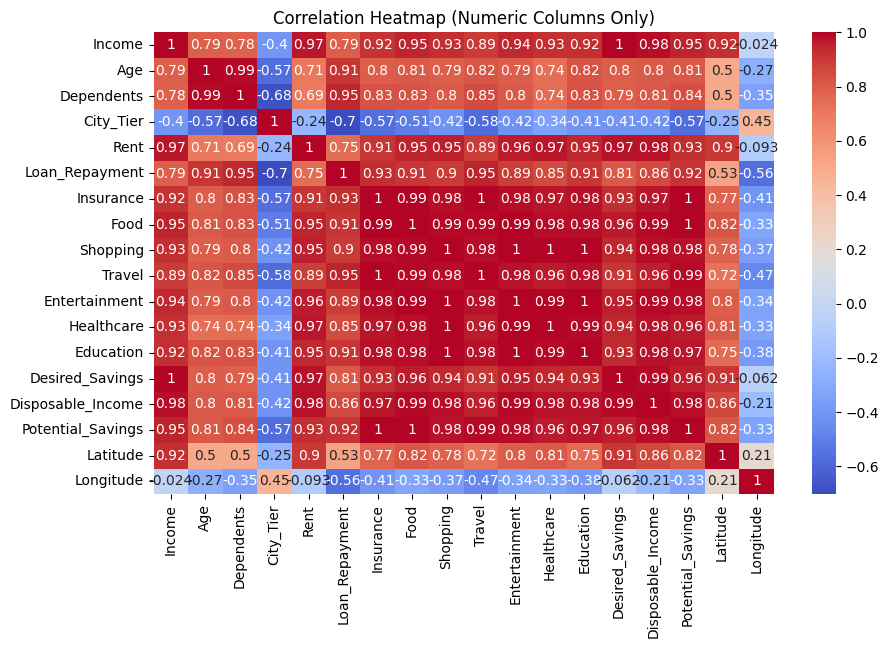

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


In [ ]:
import sqlite3

conn = sqlite3.connect('expenses.db')
df.to_sql('expenses', conn, if_exists='replace', index=False)

query = "SELECT City_Tier, AVG(Income) as avg_income FROM expenses GROUP BY City_Tier"
pd.read_sql(query, conn)


,City_Tier,avg_income
0,1,55000.0
1,2,62500.0
2,3,40000.0


In [ ]:
!pip install folium
import folium

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"Income: {row['Income']}").add_to(m)
m.save('map.html')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['Income','Age','Rent']]
y = df['Potential_Savings'] > 5000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)


1.0

In [ ]:
!pip install dash pyngrok plotly

from dash import Dash, dcc, html
import plotly.express as px
from pyngrok import ngrok

app = Dash(__name__)

fig = px.bar(df, x='City_Tier', y='Income', color='City_Tier')

app.layout = html.Div([dcc.Graph(figure=fig)])
public_url = ngrok.connect(8050)
app.run_server(port=8050)
print(public_url)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.2 MB/s eta 0:00:00


ERROR:pyngrok.process.ngrok:t=2025-08-31T09:27:06+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-31T09:27:06+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-31T09:27:06+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Paste your ngrok authtoken here
ngrok.set_auth_token("YOUR_NGROK_AUTHTOKEN")


In [ ]:
!pip install plotly


In [ ]:
!pip install -U kaleido

import plotly.express as px


fig = px.bar(df, x='City_Tier', y='Income', color='City_Tier',
             title='Income by City Tier')
fig.show()


fig = px.scatter(df, x='Age', y='Income', size='Potential_Savings',
                 color='City_Tier', hover_data=['Occupation'],
                 title='Income vs Age with Potential Savings')
fig.show()


fig = px.pie(df, names='City_Tier', values='Income', title='Income Distribution by City Tier')
fig.show()


plt.savefig("chart_name.png")  # Matplotlib/Seaborn
fig.write_image("plotly_chart.png")  # Plotly




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.7 MB/s eta 0:00:00


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


<Figure size 640x480 with 0 Axes>

In [ ]:
fig = px.scatter(df, x='Age', y='Income', size='Potential_Savings',
                 color='City_Tier', hover_data=['Occupation'],
                 title='Income vs Age with Potential Savings')
fig.show()


In [ ]:
fig = px.pie(df, names='City_Tier', values='Income', title='Income Distribution by City Tier')
fig.show()
